In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
import plotly.graph_objects as go
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture

import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('marketing_campaign.csv',sep=';',header=0)

In [159]:
data=pd.read_csv("/content/marketing_campaign.csv",sep=";",header=0)

In [160]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [161]:
data.shape

(2240, 29)

In our dataset we have 2240 rows and 29 columns.

In [162]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Finding Null values in dataset

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [164]:
data.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Finding Sum of null values in each columns. Here we find that only in Income column we have 24 null values.

In [165]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Finding Duplicate values


In [166]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [167]:
data.duplicated().sum()


0

# Data Cleaning

Formate Date to Datetime

In [168]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])
data.columns=data.columns.str.lower()


In [169]:
data.head(3)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


Fill in null values

Finding percentage of missing values in dataset.
Here we find that only 1.07% of income data is missing.

In [170]:
missing_data_percentage=data.isnull().sum()*100/len(data)
missing_data_percentage

id                     0.000000
year_birth             0.000000
education              0.000000
marital_status         0.000000
income                 1.071429
kidhome                0.000000
teenhome               0.000000
dt_customer            0.000000
recency                0.000000
mntwines               0.000000
mntfruits              0.000000
mntmeatproducts        0.000000
mntfishproducts        0.000000
mntsweetproducts       0.000000
mntgoldprods           0.000000
numdealspurchases      0.000000
numwebpurchases        0.000000
numcatalogpurchases    0.000000
numstorepurchases      0.000000
numwebvisitsmonth      0.000000
acceptedcmp3           0.000000
acceptedcmp4           0.000000
acceptedcmp5           0.000000
acceptedcmp1           0.000000
acceptedcmp2           0.000000
complain               0.000000
z_costcontact          0.000000
z_revenue              0.000000
response               0.000000
dtype: float64

In [171]:
data['income'].bfill

<bound method Series.bfill of 0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: income, Length: 2240, dtype: float64>

In [172]:
data['income'].bfill(inplace=True)
data['income'].bfill

<bound method Series.bfill of 0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: income, Length: 2240, dtype: float64>

In [173]:
data.isnull().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64

Feature creating.


In [174]:
data['age']=np.subtract(2023,data['year_birth'])
data['age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: age, Length: 2240, dtype: int64

In [175]:
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age'],
      dtype='object')

In [176]:
print(data.shape)

(2240, 30)


Visit

In [177]:
data['visit'] =data['recency'].apply(lambda x : 'Regular' if (x>=0 and x<=31 ) else 'Not Regular')
data['visit']

0       Not Regular
1       Not Regular
2           Regular
3           Regular
4       Not Regular
           ...     
2235    Not Regular
2236    Not Regular
2237    Not Regular
2238        Regular
2239    Not Regular
Name: visit, Length: 2240, dtype: object

Income Level

In [178]:
data['income_level']=data['income'].apply(
    lambda x : 'Low_Income' if (x<=50000)
    else 'Medium_Income' if (x>=50000 and x<=150000)
    else 'High')

data['income_level']


0       Medium_Income
1          Low_Income
2       Medium_Income
3          Low_Income
4       Medium_Income
            ...      
2235    Medium_Income
2236    Medium_Income
2237    Medium_Income
2238    Medium_Income
2239    Medium_Income
Name: income_level, Length: 2240, dtype: object

In [179]:
print(data.columns)
print(data.shape)


Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'visit', 'income_level'],
      dtype='object')
(2240, 32)


In [180]:
data['Total_Children']=np.add(data['kidhome'],data['teenhome'])
data['Total_Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2240, dtype: int64

Total Purchase

In [181]:
data['Total_Purchase']=data['mntfruits']+data['mntwines']+data['mntmeatproducts']+data['mntfishproducts']+data['mntsweetproducts']+data['mntgoldprods']
data['Total_Purchase']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Purchase, Length: 2240, dtype: int64

In [182]:
data.iloc[:5]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,visit,income_level,Total_Children,Total_Purchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,66,Not Regular,Medium_Income,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,69,Not Regular,Low_Income,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,58,Regular,Medium_Income,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,39,Regular,Low_Income,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,42,Not Regular,Medium_Income,1,422


# EDA- Exploratory Data Analysis

Mean

In [183]:
round(data[['age','income','Total_Children']].mean())

age                  54.0
income            52152.0
Total_Children        1.0
dtype: float64

Trimmed mean

In [184]:
from scipy.stats import trim_mean
cols=['age','income','Total_Children']

for index in cols:
  print(f"{index} : {trim_mean(data[index].sort_values(ascending=False),0.1):,.0f}")

age : 54
income : 51,673
Total_Children : 1


Weighted Mean

In [185]:
for index in cols:
  print(f"{index} : {np.average(data[index],weights=data['recency']):,.0f}")

age : 54
income : 52,090
Total_Children : 1


Median

In [186]:
data[['age','income','Total_Children']].median()

age                  53.0
income            51342.0
Total_Children        1.0
dtype: float64

Weighted Median

In [187]:
!pip install wquantiles
import wquantiles as wq
for index in cols:
  print(f"{index} : {wq.median(data[index],weights=data['recency']):,.0f}")



age : 53
income : 51,384
Total_Children : 1


Estimated variability

Variance

In [188]:
round(data[['age','income','Total_Children']].var())

age                     144.0
income            632005245.0
Total_Children            1.0
dtype: float64

Standard deviation

In [189]:
round(data[['age','income','Total_Children']].std())

age                  12.0
income            25140.0
Total_Children        1.0
dtype: float64

Mean Absolute Deviation

In [190]:
for index in cols :
  print(f"{index} : {np.mean(np.absolute(data[index]-data[index].mean())):,.0f}")

age : 10
income : 18,135
Total_Children : 1


Median Absolute deviation

In [191]:
for index in cols :
  print(f"{index} : {np.median(np.absolute(data[index]-data[index].median())):,.0f}")

age : 9
income : 16,569
Total_Children : 0


Inter Quartile Range

In [192]:
for index in cols:
  iqr1,iqr2=np.percentile(data[index],[75,25])

print(iqr1)
print(iqr2)
print(f"{index} : {np.subtract(iqr1,iqr2)}")

1.0
0.0
Total_Children : 1.0


#EDA-- Exploratory Data Analysis

Boxplot

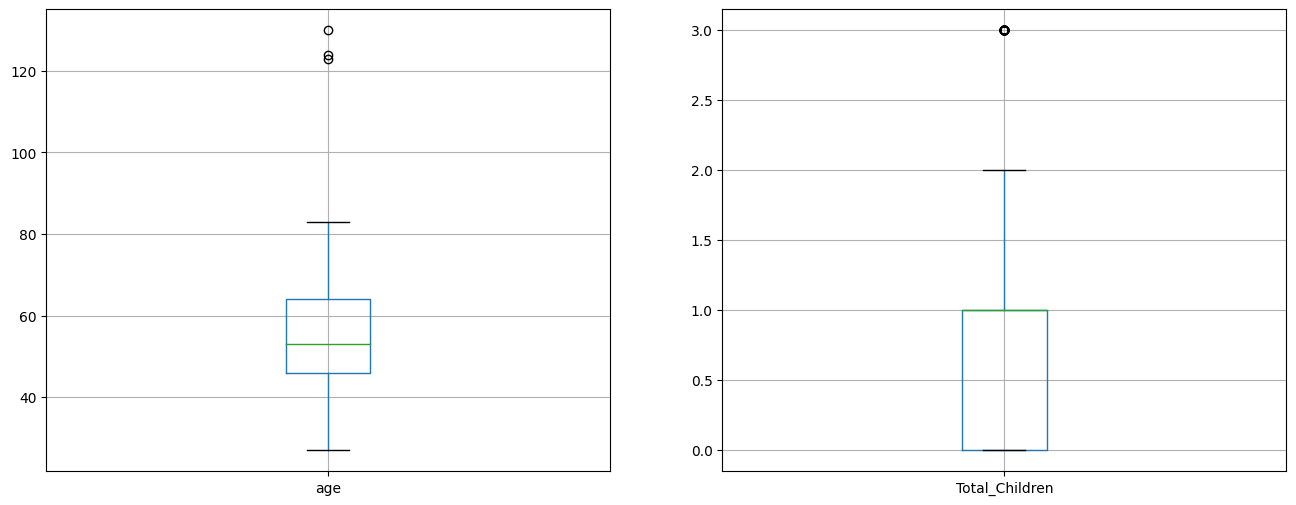

In [193]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data.boxplot(column=["age"])
plt.subplot(1,2,2)
data.boxplot(column=["Total_Children"])
plt.show()

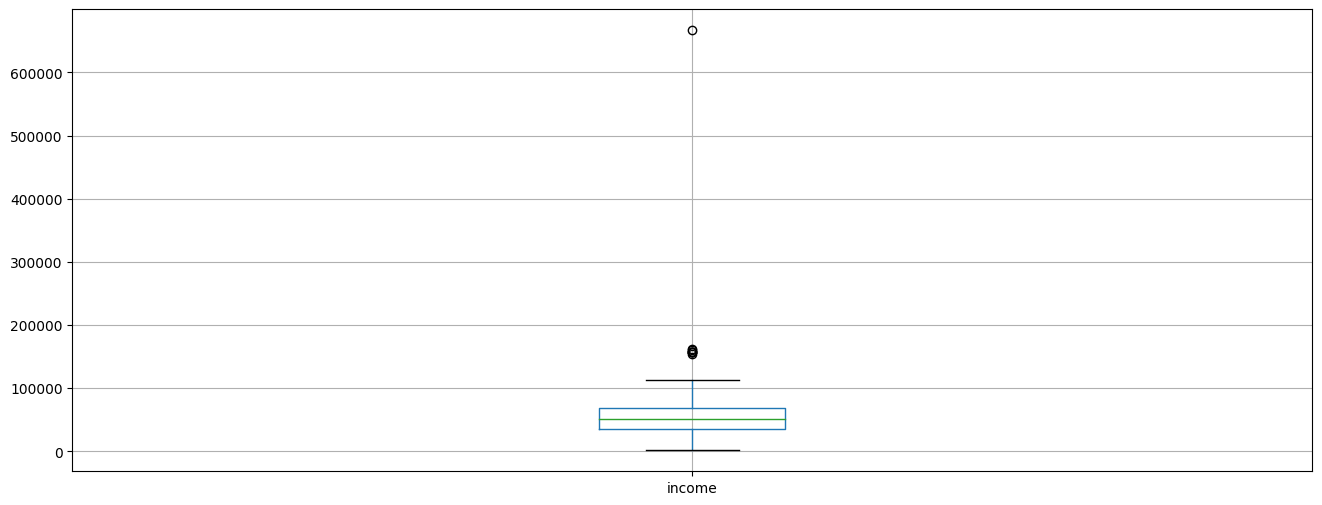

In [194]:
plt.figure(figsize=(16,6))
data.boxplot(column=['income'])
plt.show()

Percentile

In [195]:
data[['age','income','Total_Children']].quantile([0.05,0.25,0.5,0.70,1])

,age,income,Total_Children
0.05,35.0,18975.55,0.0
0.25,46.0,35196.00,0.0
0.50,53.0,51342.00,1.0
0.70,61.0,65182.00,1.0
1.00,130.0,666666.00,3.0


In [196]:
print(data[['age','income','Total_Children']].quantile([0.05,0.25,0.5,0.70,1]))

        age     income  Total_Children
0.05   35.0   18975.55             0.0
0.25   46.0   35196.00             0.0
0.50   53.0   51342.00             1.0
0.70   61.0   65182.00             1.0
1.00  130.0  666666.00             3.0


Histogram & KDE

Age

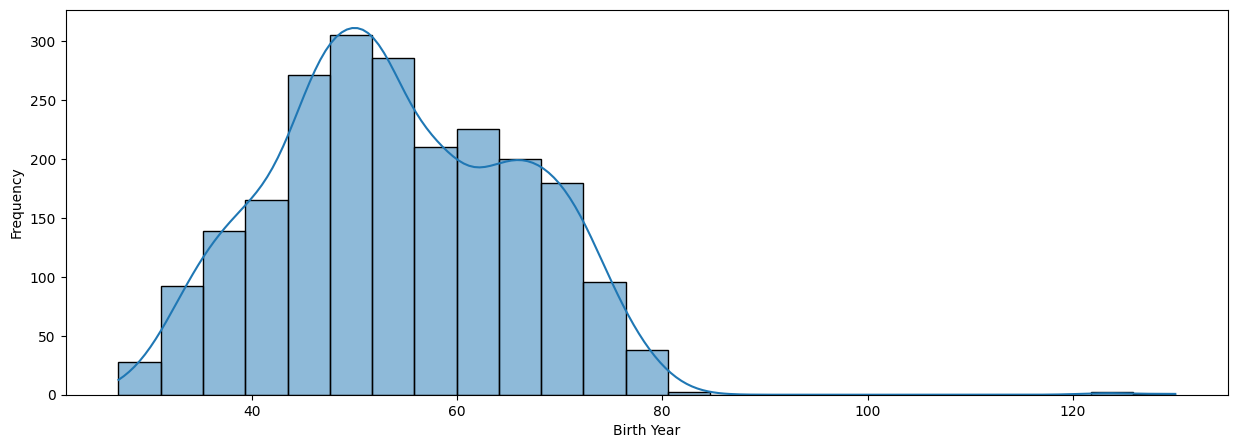

In [197]:
plt.figure(figsize=(15,5))
sns.histplot(x=data['age'],kde=True,bins=25)
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.show()

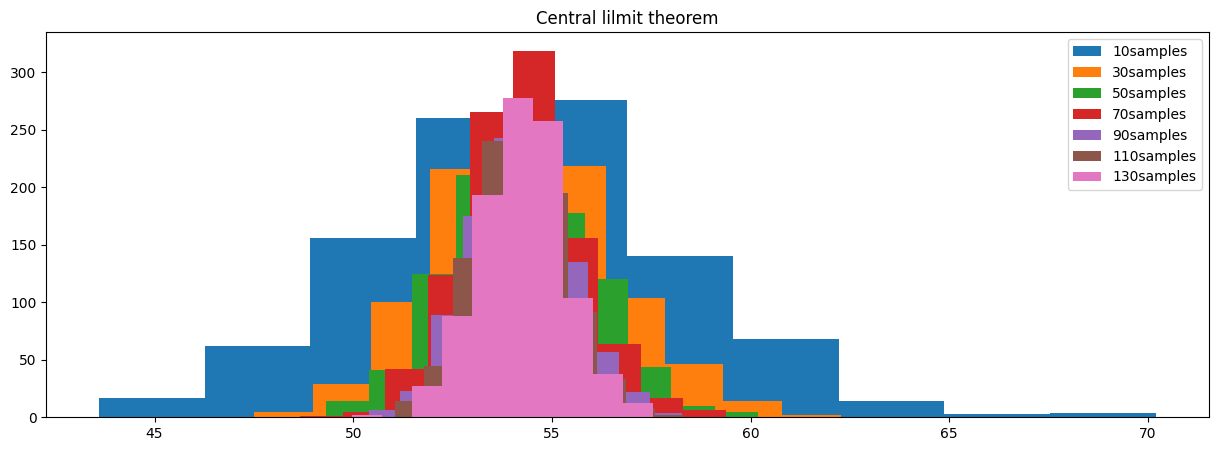

In [198]:
plt.figure(figsize=(15,5))
sample_amounts=range(10,150,20)
for index in sample_amounts:
  samples= []
  for i in range(1000):
    samples.append(data['age'].sample(index).mean())
  plt.hist(samples)
plt.legend([str(z)+'samples' for z in sample_amounts])
plt.title("Central lilmit theorem")
plt.show()



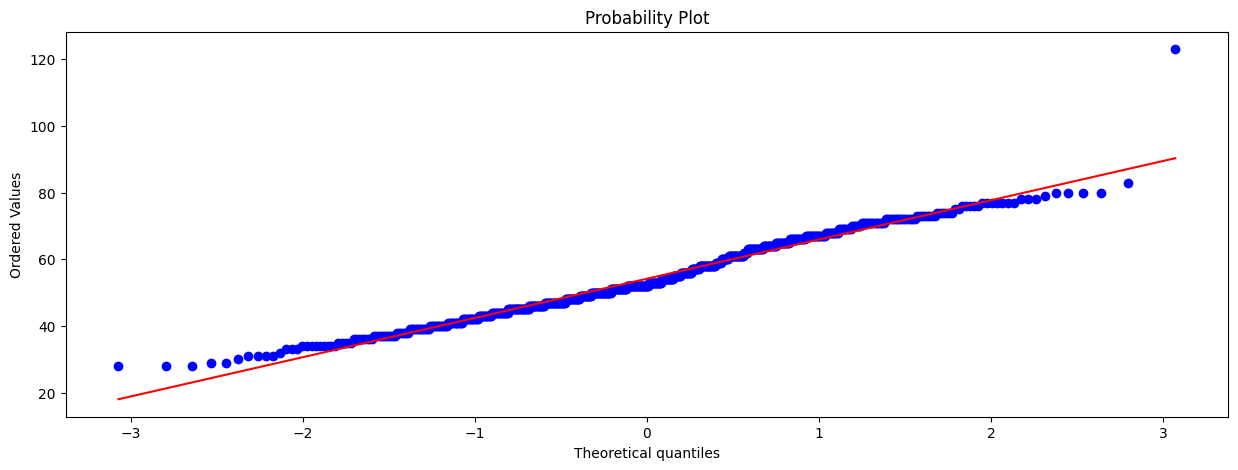

In [199]:
import scipy.stats as st
fig,ax=plt.subplots(figsize=(15,5))
norm_sample=data['age'].sample(649)
st.probplot(norm_sample,plot=ax)
plt.show()

Income

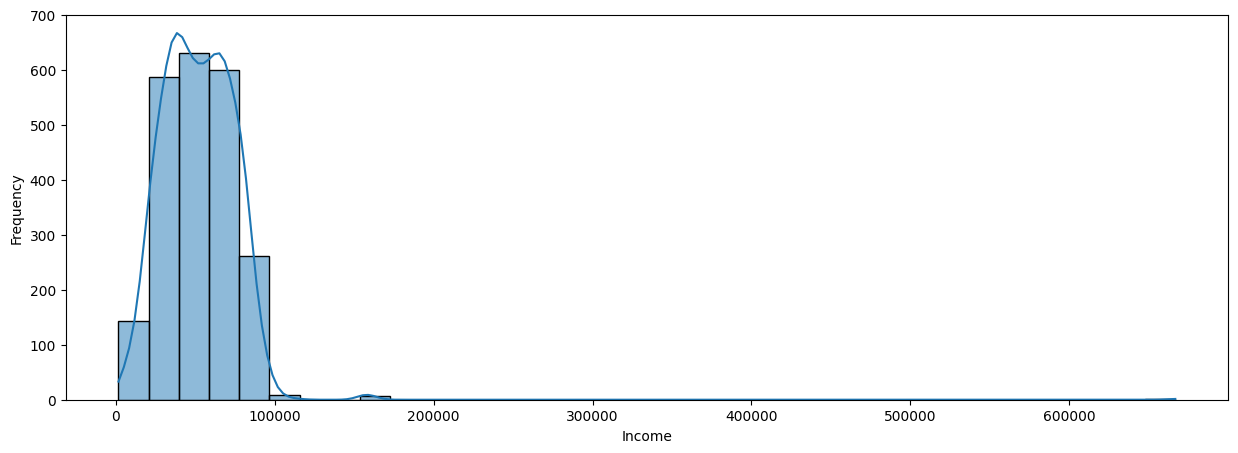

In [200]:
plt.figure(figsize=(15,5))
sns.histplot(x=data['income'],kde=True,bins=35)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Income is Right skewed

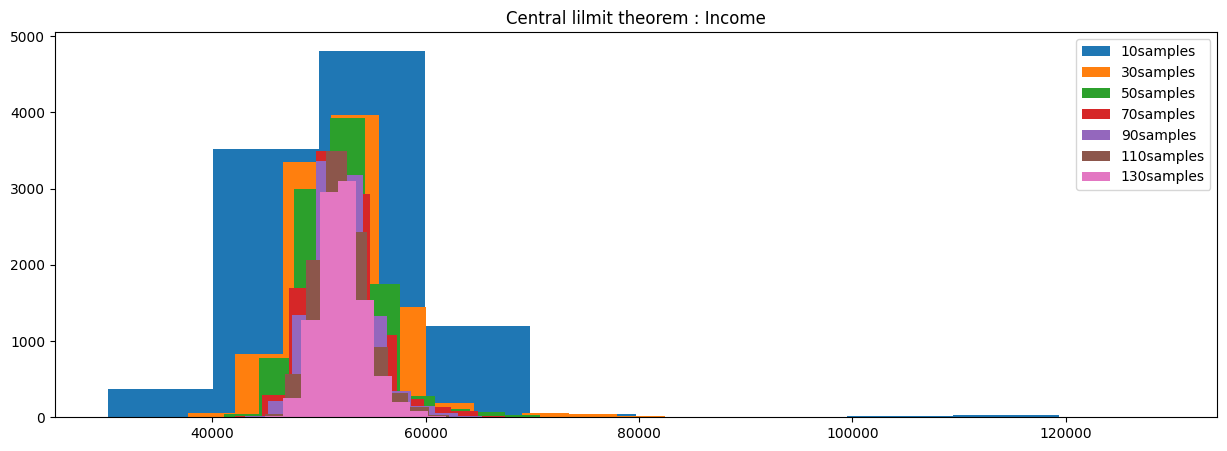

In [201]:
plt.figure(figsize=(15,5))
plt.sample_amounts=range(10,200,20)
for index in sample_amounts :
  samples= []
  for i in range(10000):
    samples.append(data['income'].sample(index).mean())
  plt.hist(samples)
plt.legend([str(z)+'samples' for z in sample_amounts])
plt.title("Central lilmit theorem : Income")
plt.show()


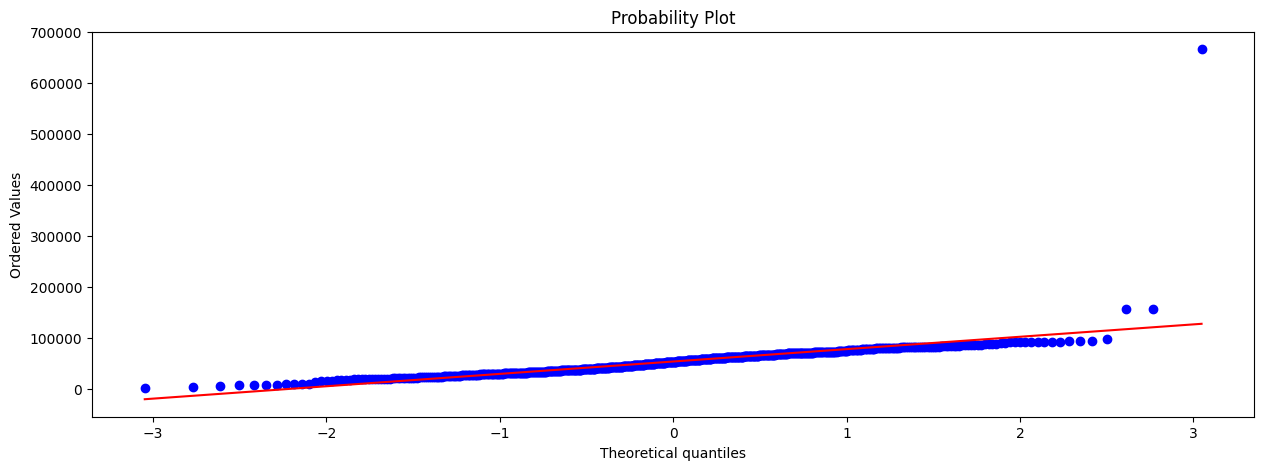

In [202]:
plt,ax=plt.subplots(figsize=(15,5))
norm_sample=data['income'].sample(599)
st.probplot(norm_sample,plot=ax)
plt.show()

AttributeError: ignored

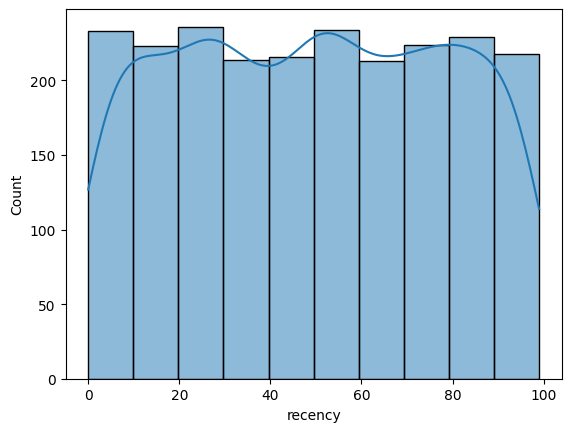

In [204]:

sns.histplot(x=data['recency'],kde=True,bins=10)
plt.title("Recency")
plt.show()

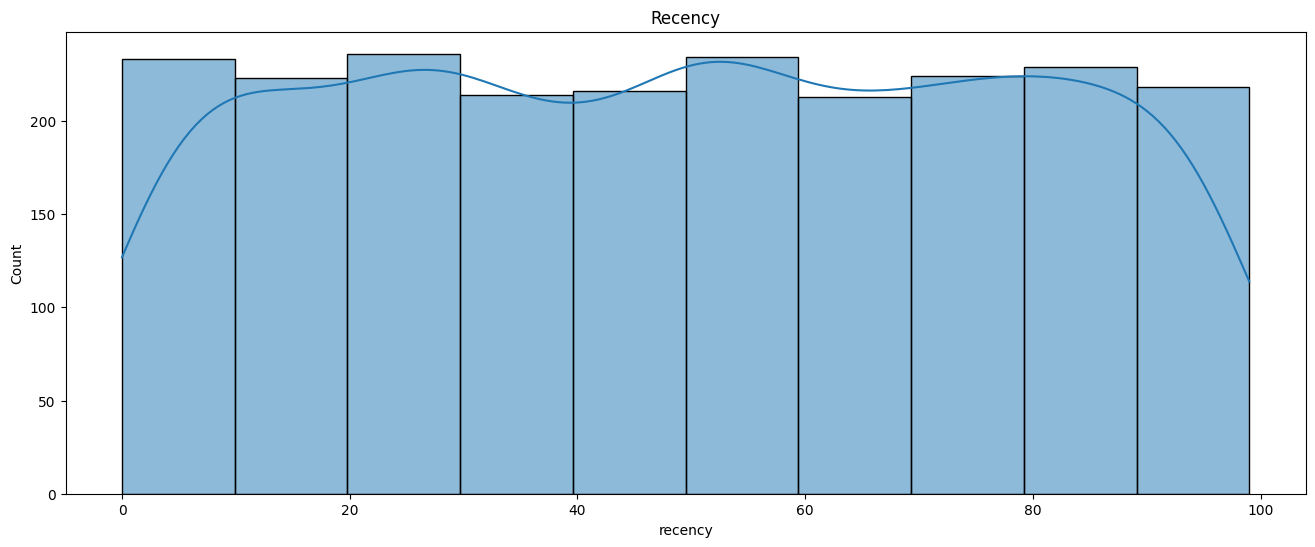

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.histplot(x=data['recency'],bins=10,kde=True)
plt.title('Recency')
plt.show()

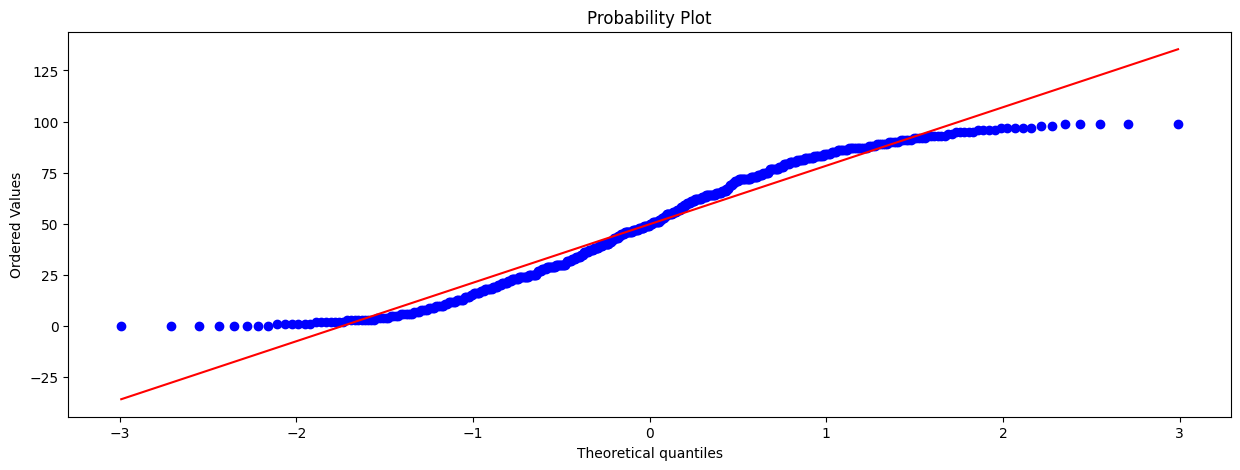

In [206]:
fig,ax=plt.subplots(figsize=(15,5))
norm_sample=data['recency'].sample(499)
st.probplot(norm_sample,plot=ax)
plt.show()

Explain two or more variable

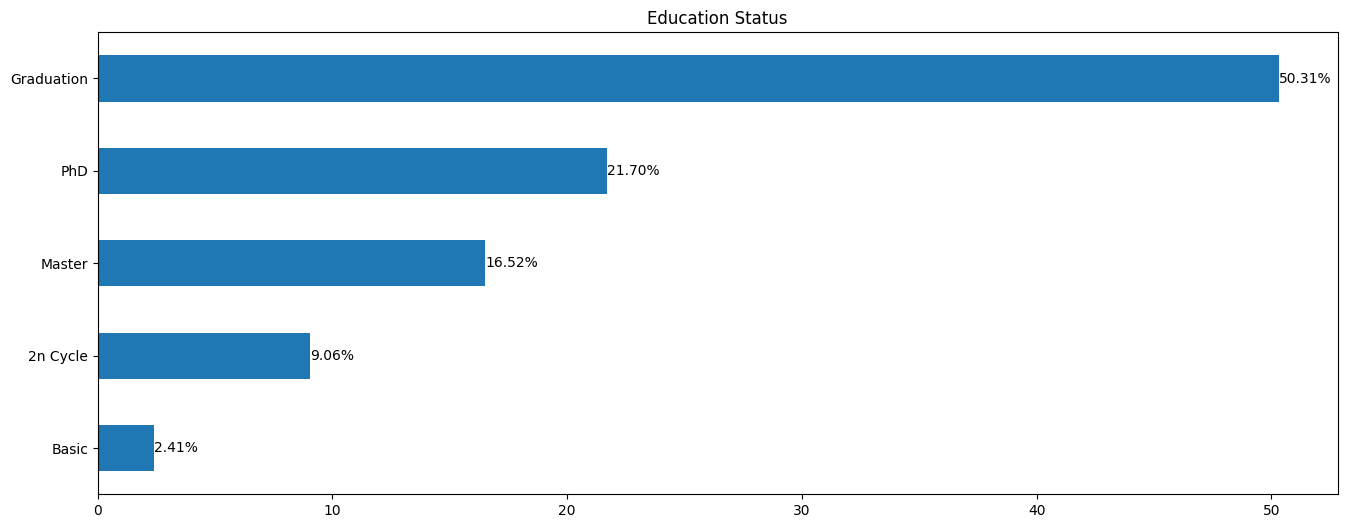

In [207]:
ax=(data['education'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6),title='Education Status')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

50% Customers as graduates

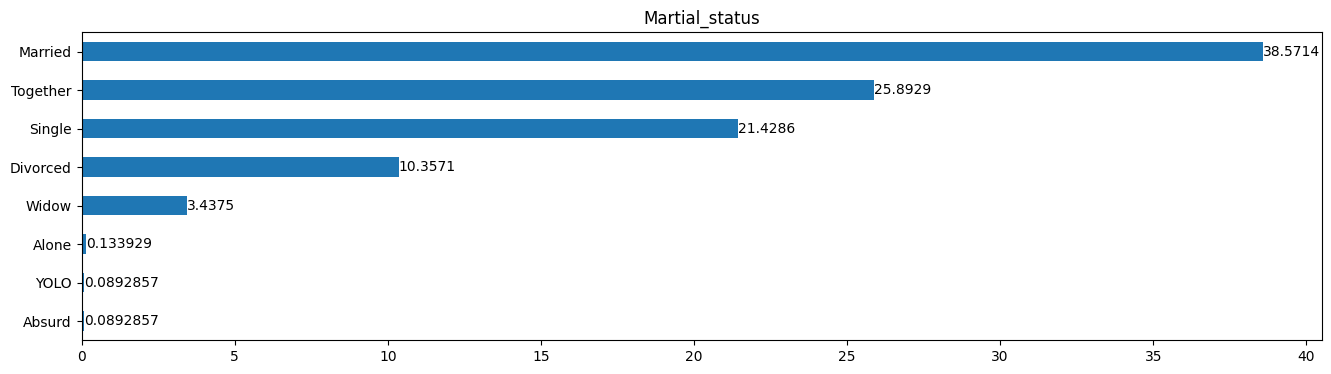

In [208]:
ax=(data['marital_status'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,4),title='Martial_status')
for a in ax.containers:
  plt.bar_label(a)
plt.show()

Almost 38% of population is married,while Yolo & Absurd consist of 0.18% of population.

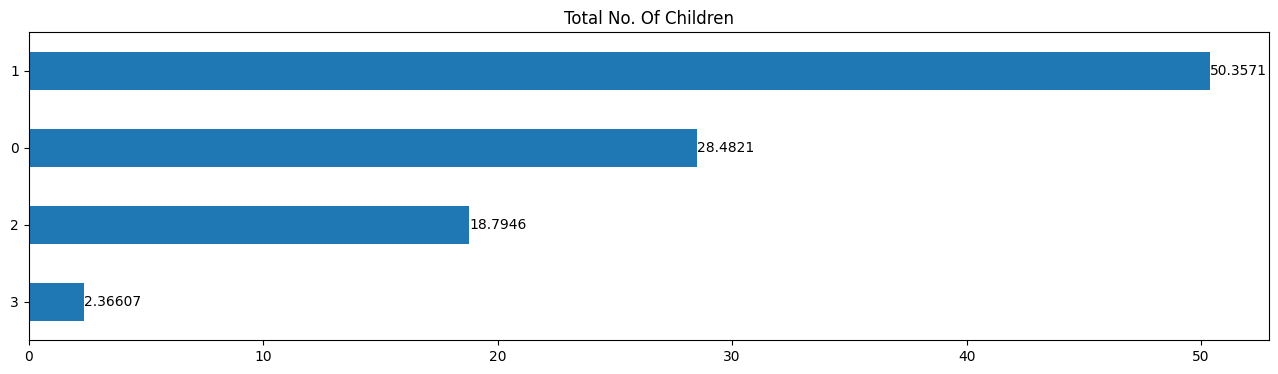

In [209]:
ax=(data['Total_Children'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,4),title="Total No. Of Children")
for a in ax.containers:
  plt.bar_label(a)

plt.show()

Almost 50% of population have 1 children. Approx 28.5% of population have No children while 2.3% population have 3 children.

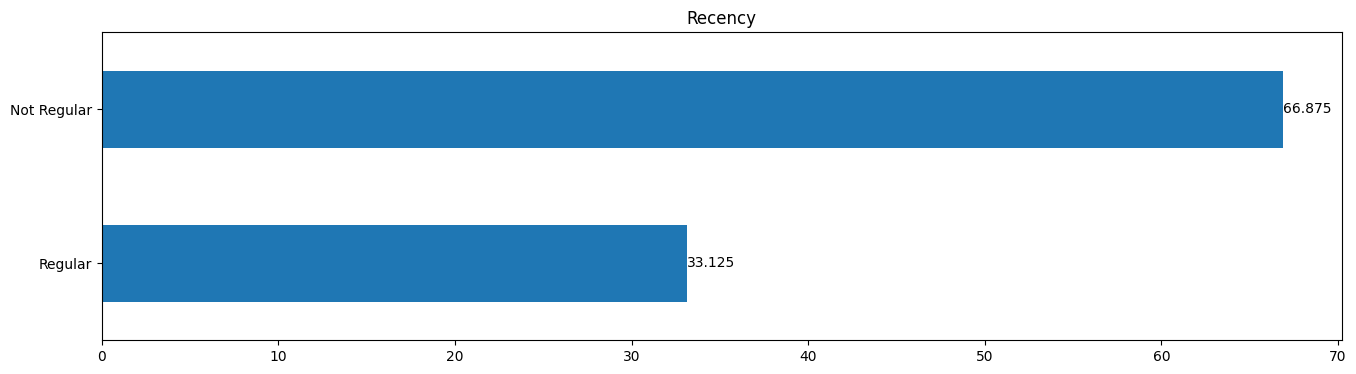

In [210]:
 ax=(data['visit'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,4),title="Recency")
 for a in ax.containers:
  plt.bar_label(a)

plt.show()

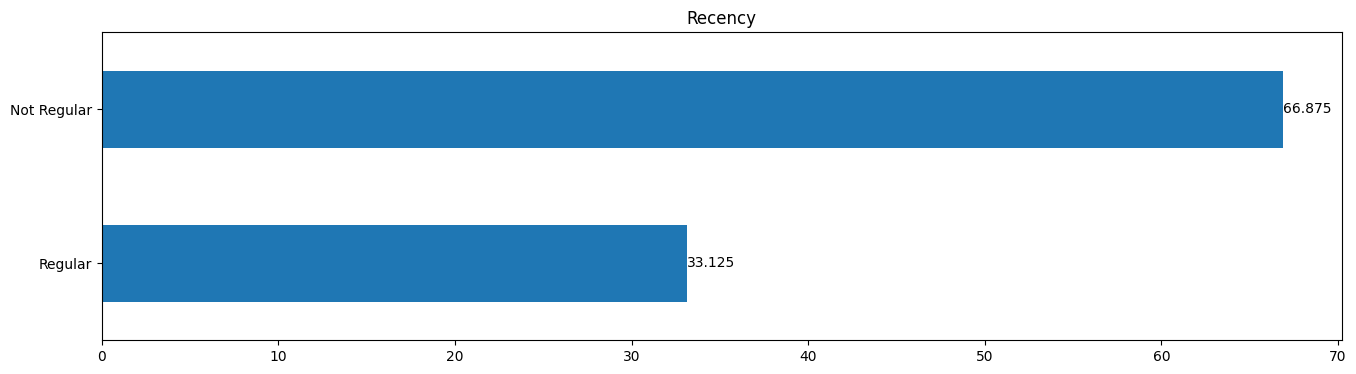

In [211]:
ax=(data['visit'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,4),title="Recency")
for a in ax.containers:
  plt.bar_label(a)

plt.show()

Almost 67% of total customers are not regular

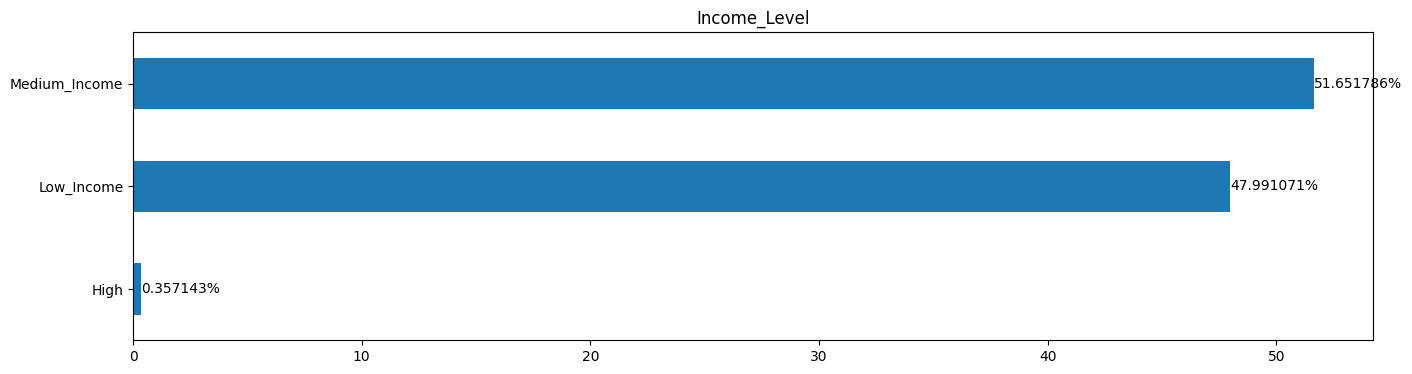

In [212]:
ax=(data['income_level'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,4),title="Income_Level")
for a in ax.containers:
  plt.bar_label(a,fmt='%2f%%')
plt.show()

Only 0.36% of population comes under High income velev family, which is less then 0.5% of total population. 51.6% of population is medium income level family.

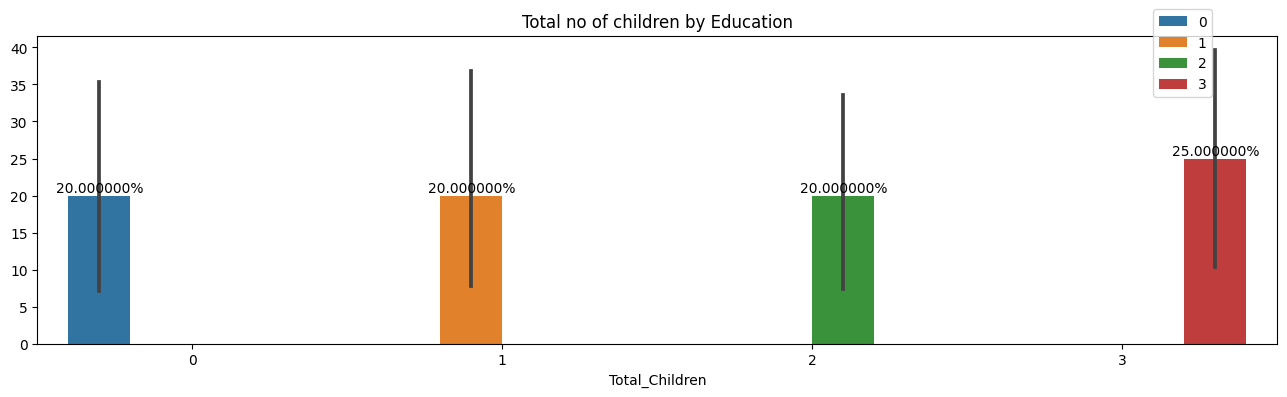

In [213]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('Total_Children')['education'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('Total_Children')['education'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('Total_Children')['education'].value_counts(normalize=True)*100).index.get_level_values(0)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("Total no of children by Education")
plt.legend(loc=[0.9,0.8])
plt.show()

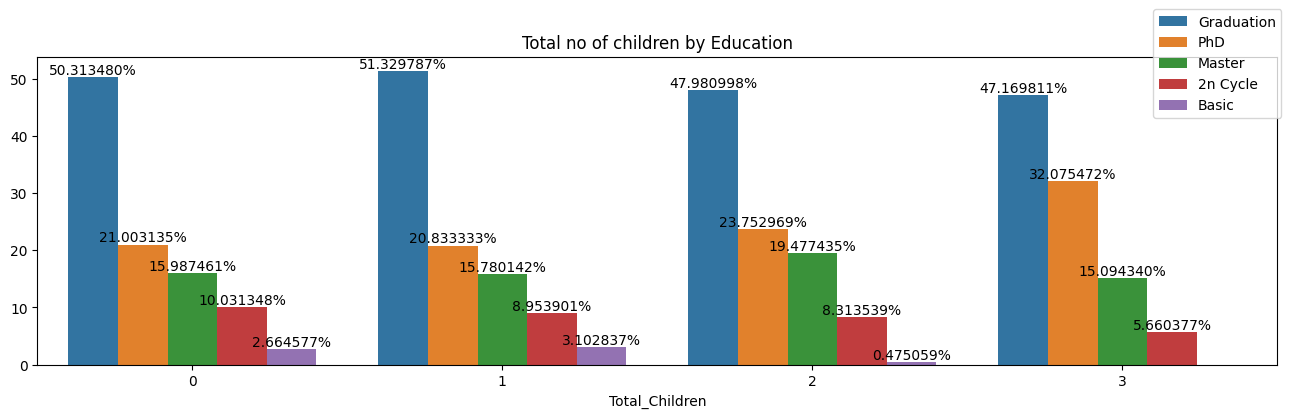

In [214]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('Total_Children')['education'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('Total_Children')['education'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('Total_Children')['education'].value_counts(normalize=True)*100).index.get_level_values(1)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("Total no of children by Education")
plt.legend(loc=[0.9,0.8])
plt.show()

As per analyzing graph Graduates are widely distributed as compared to basic education.

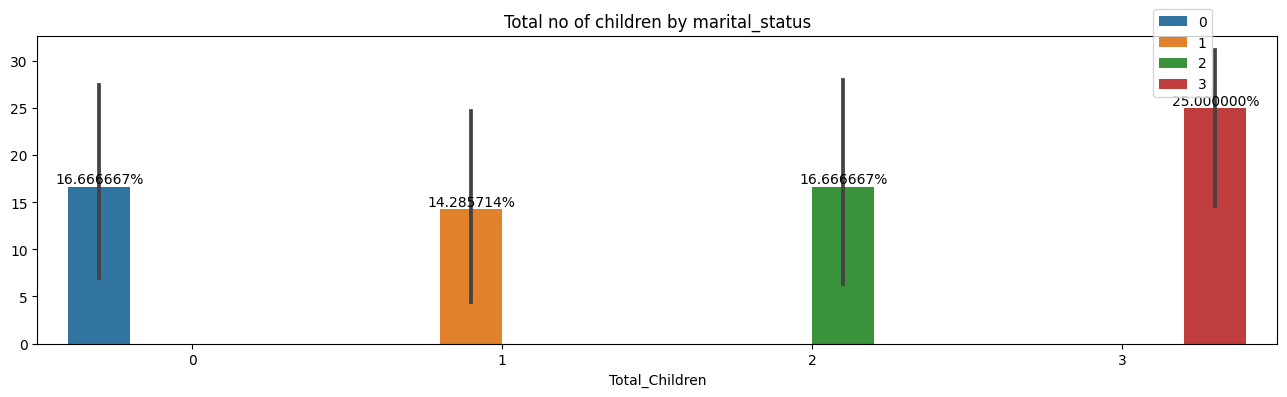

In [215]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('Total_Children')['marital_status'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('Total_Children')['marital_status'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('Total_Children')['marital_status'].value_counts(normalize=True)*100).index.get_level_values(0)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("Total no of children by marital_status")
plt.legend(loc=[0.9,0.8])
plt.show()

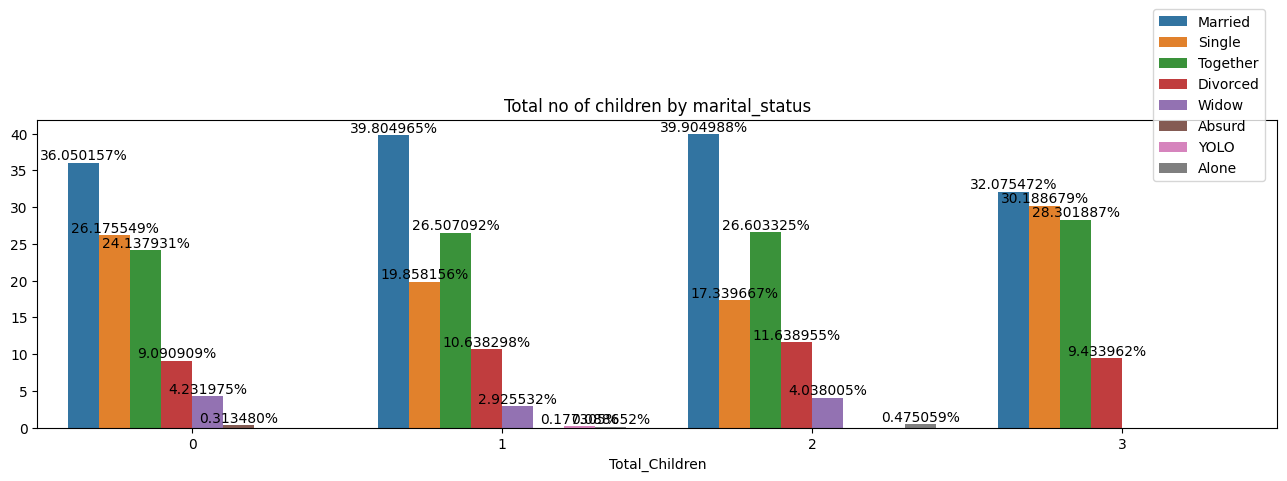

In [216]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('Total_Children')['marital_status'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('Total_Children')['marital_status'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('Total_Children')['marital_status'].value_counts(normalize=True)*100).index.get_level_values(1)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("Total no of children by marital_status")
plt.legend(loc=[0.9,0.8])
plt.show()

Married couples are greatly dispersed compared to YOLO and Absurd people.

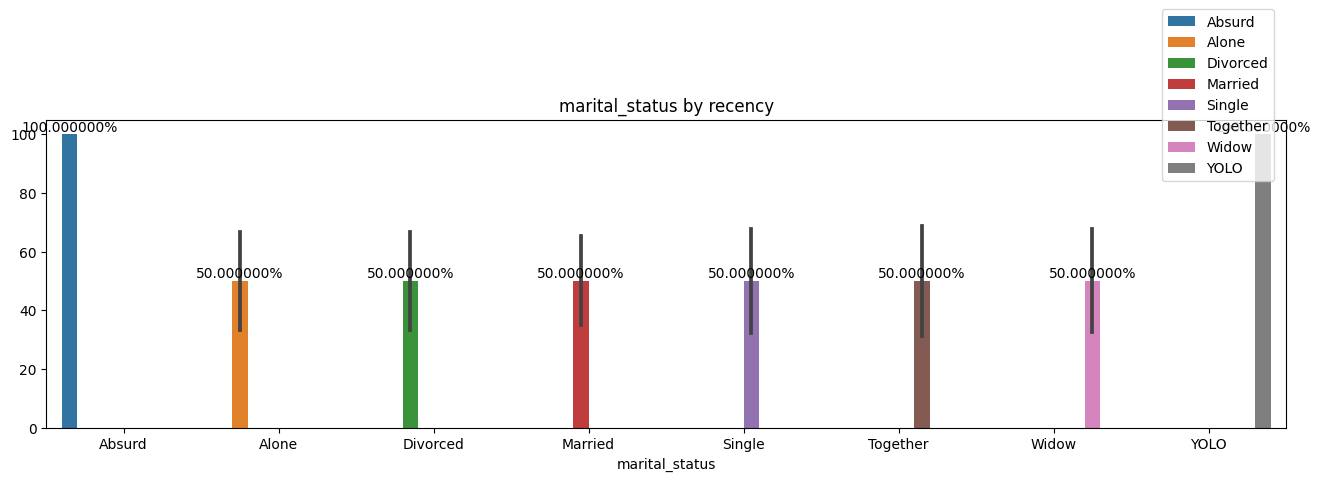

In [217]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('marital_status')['visit'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('marital_status')['visit'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('marital_status')['visit'].value_counts(normalize=True)*100).index.get_level_values(0)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("marital_status by recency")
plt.legend(loc=[0.9,0.8])
plt.show()

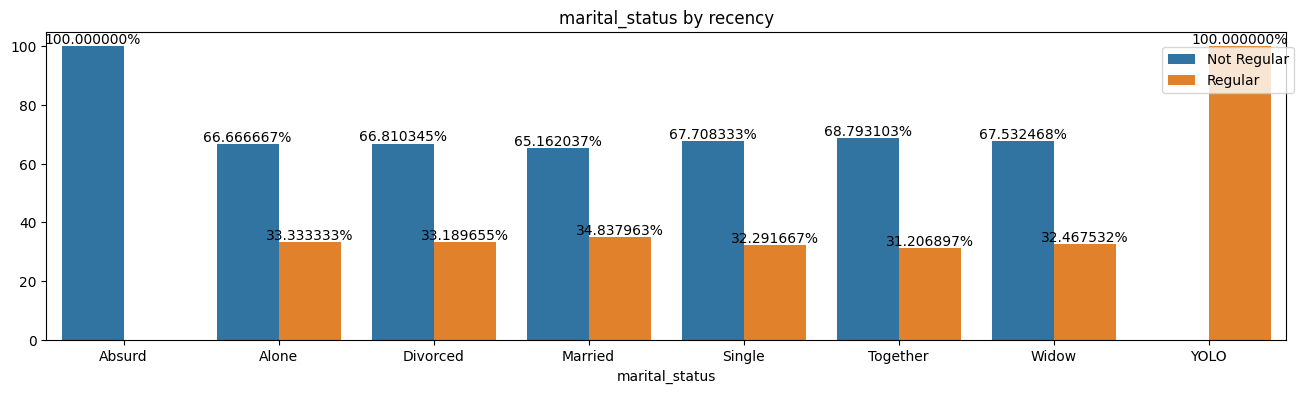

In [218]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('marital_status')['visit'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('marital_status')['visit'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('marital_status')['visit'].value_counts(normalize=True)*100).index.get_level_values(1)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("marital_status by recency")
plt.legend(loc=[0.9,0.8])
plt.show()

All yolo couples are regular customers where as Absurd couples are not regular customers

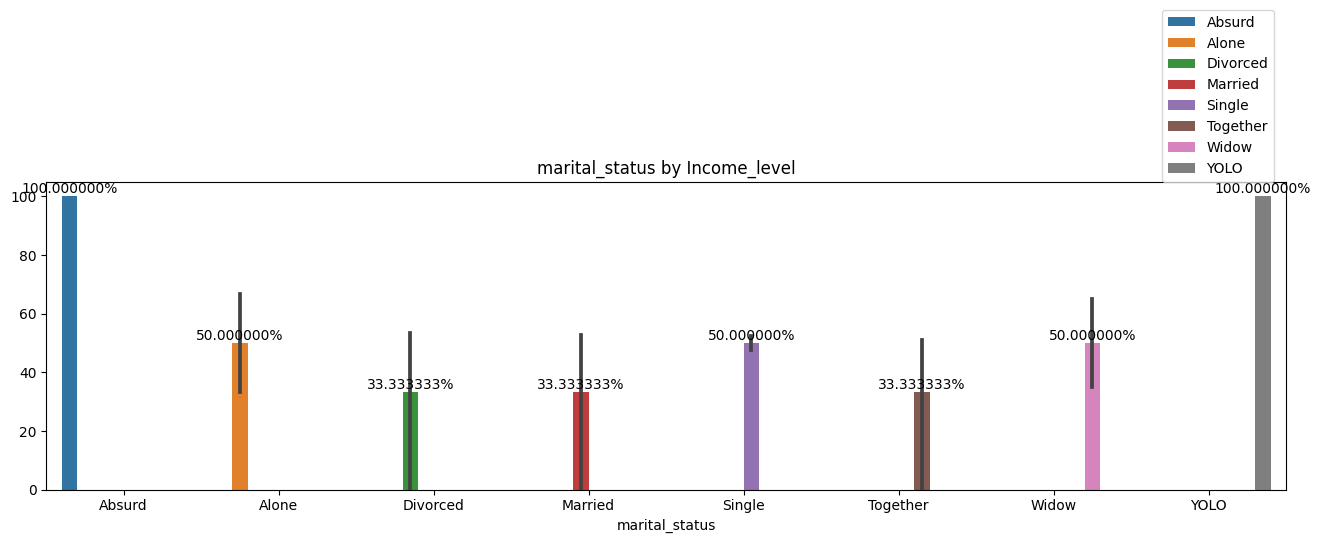

In [219]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('marital_status')['income_level'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('marital_status')['income_level'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('marital_status')['income_level'].value_counts(normalize=True)*100).index.get_level_values(0)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("marital_status by Income_level")
plt.legend(loc=[0.9,1.0])
plt.show()

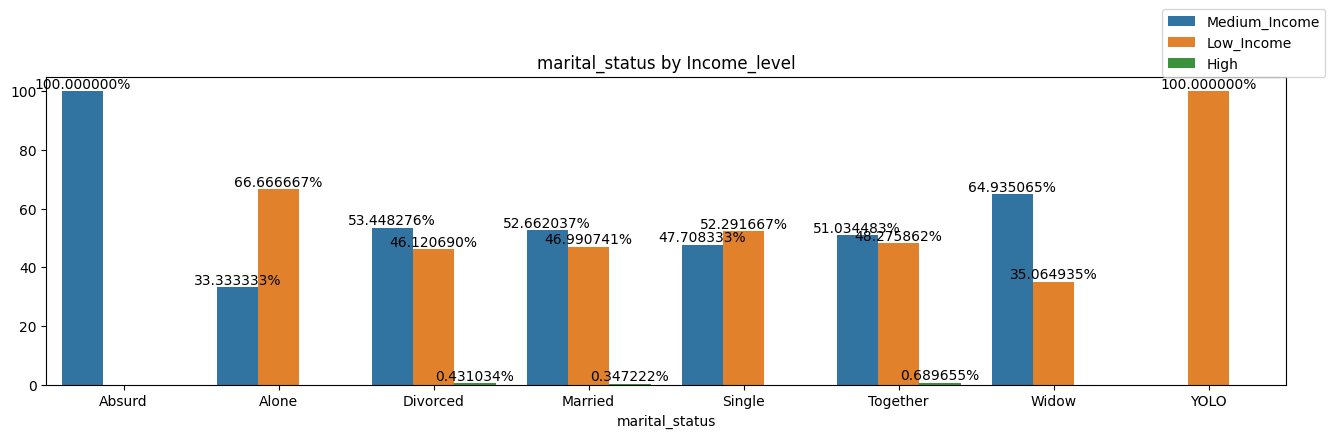

In [220]:
plt.figure(figsize=(16,4))
ax=sns.barplot(
    x=(data.groupby('marital_status')['income_level'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('marital_status')['income_level'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('marital_status')['income_level'].value_counts(normalize=True)*100).index.get_level_values(1)
    )
for a in ax.containers:
  plt.bar_label(a,fmt="%2f%%")
plt.title("marital_status by Income_level")
plt.legend(loc=[0.9,1.0])
plt.show()

Yolo couples are low income. Absurd couples as medium income. And Married, Divorced and together couples approx 1.45% of high income.

Correlation

Correlation Matrix

In [221]:
data[['age','income','Total_Children']].corr()

,age,income,Total_Children
age,1.000000,0.159824,0.090199
income,0.159824,1.000000,-0.289917
Total_Children,0.090199,-0.289917,1.000000


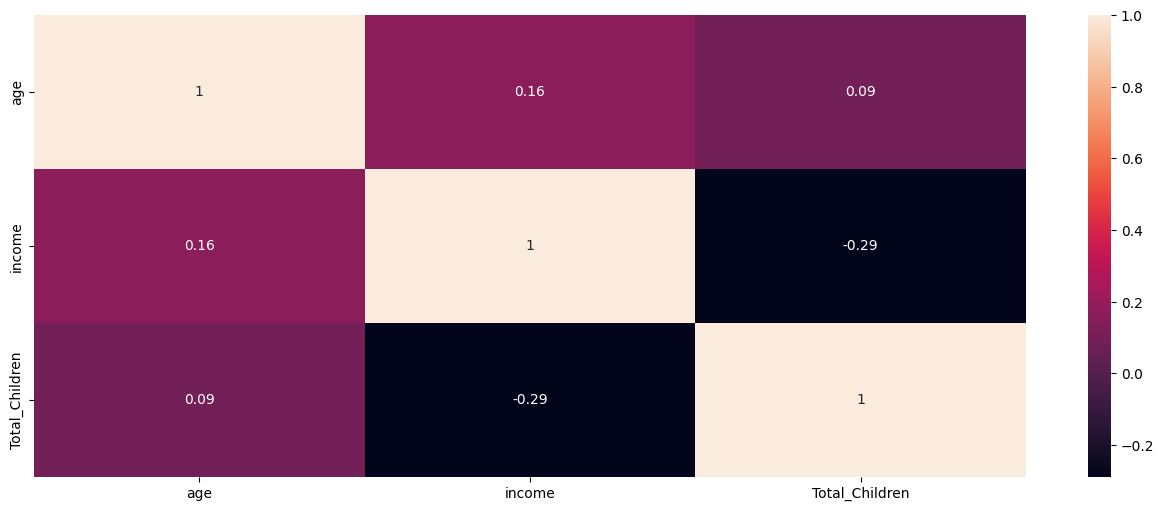

In [222]:
plt.figure(figsize=(16,6))
sns.heatmap(data[['age','income','Total_Children']].corr(),annot=True)
plt.show()

Low correlation between :
1. Age and income
2. Income and Total_children


In [223]:
data.corr()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,Total_Children,Total_Purchase
id,1.000000,0.000028,0.013012,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968,-0.000028,-0.000146,-0.018054
year_birth,0.000028,1.000000,-0.159824,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325,-1.000000,-0.090199,-0.111306
income,0.013012,-0.159824,1.000000,-0.424522,0.019468,-0.004209,0.578443,0.429724,0.574934,0.438046,...,0.334865,0.277058,0.087625,-0.026744,NaN,NaN,0.134031,0.159824,-0.289917,0.664479
kidhome,0.002406,0.230176,-0.424522,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008,-0.230176,0.689971,-0.556669
teenhome,-0.002580,-0.352111,0.019468,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446,0.352111,0.698433,-0.138384
recency,-0.046524,-0.019871,-0.004209,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437,0.019871,0.018053,0.020433
mntwines,-0.022878,-0.157773,0.578443,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254,0.157773,-0.351909,0.891839
mntfruits,0.004600,-0.017917,0.429724,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289,0.017917,-0.394853,0.614229
mntmeatproducts,-0.004437,-0.030872,0.574934,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335,0.030872,-0.502208,0.842965
mntfishproducts,-0.024475,-0.041625,0.438046,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331,0.041625,-0.425503,0.642818


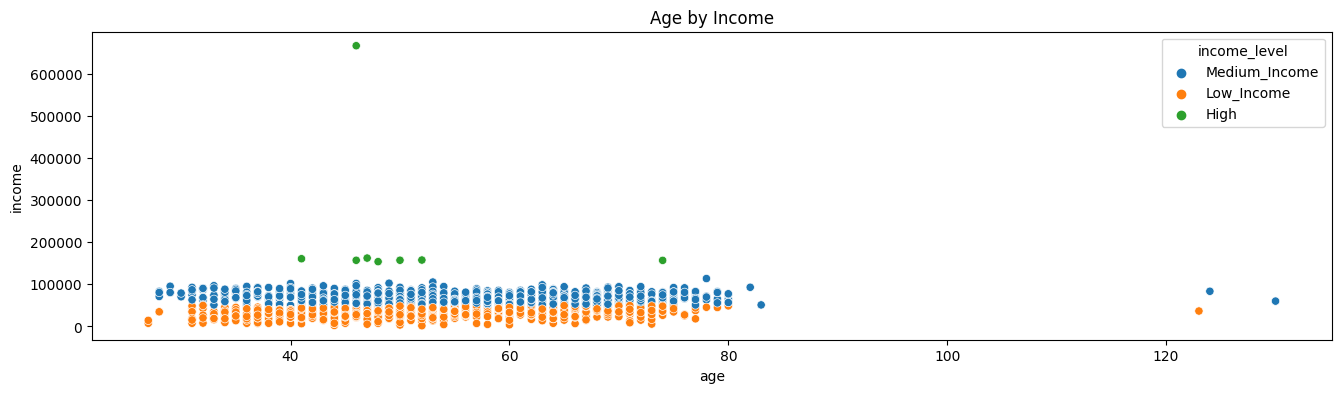

In [224]:
plt.figure(figsize=(16,4))
sns.scatterplot(x=data['age'],y=data['income'],hue=data['income_level'])
plt.title("Age by Income")
plt.show()

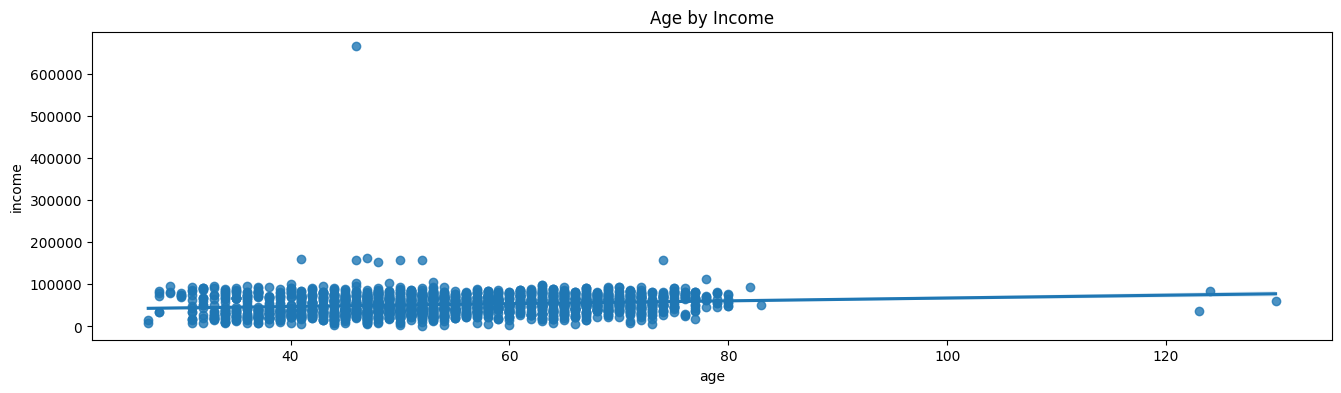

In [225]:
plt.figure(figsize=(16,4))
sns.regplot(x=data['age'],y=data['income'])
plt.title("Age by Income")
plt.show()

Low positive correlation between age and income.

Chisquare test of association:
---
.) Null Hypothesis : There is no association between age and income

---
.)Alternet Hypothesis : There is an association between age and income

In [226]:
import scipy.stats

In [227]:
from scipy.stats import chi2_contingency
result=st.chi2_contingency(data[['age','income']])
print(f"Statistics : {result.statistic}\nP-Value : {result.pvalue}\nDegree of Freedom : {result.dof}")

Statistics : 35503.59747097024
P-Value : 0.0
Degree of Freedom : 2239


Using Significant level of 5% we reject Null hypothesis in favour of Alternet hypothesis.

Exploring Binary and contingency data

Contigency Table

In [228]:
contigency_table=pd.pivot_table(data=data,index='age',columns=['Total_Children'],values='income',fill_value='No Record',aggfunc=['mean'])

In [229]:
contigency_table.iloc[1:11]

mean                                    
Total_Children             0             1          2          3
age                                                             
28                   60937.0     No Record  No Record  No Record
29              85449.333333     No Record  No Record  No Record
30                   74139.8     No Record  No Record  No Record
31              62559.666667      14688.75  No Record  No Record
32              63331.214286       26868.0  No Record  No Record
33                  45679.75  31398.333333  No Record  No Record
34              58384.090909       34417.0  No Record  No Record
35              75081.333333  28794.647059  No Record  No Record
36              55943.666667  28778.666667  No Record  No Record
37              63497.214286  33596.925926    19485.0  No Record

Boxplot

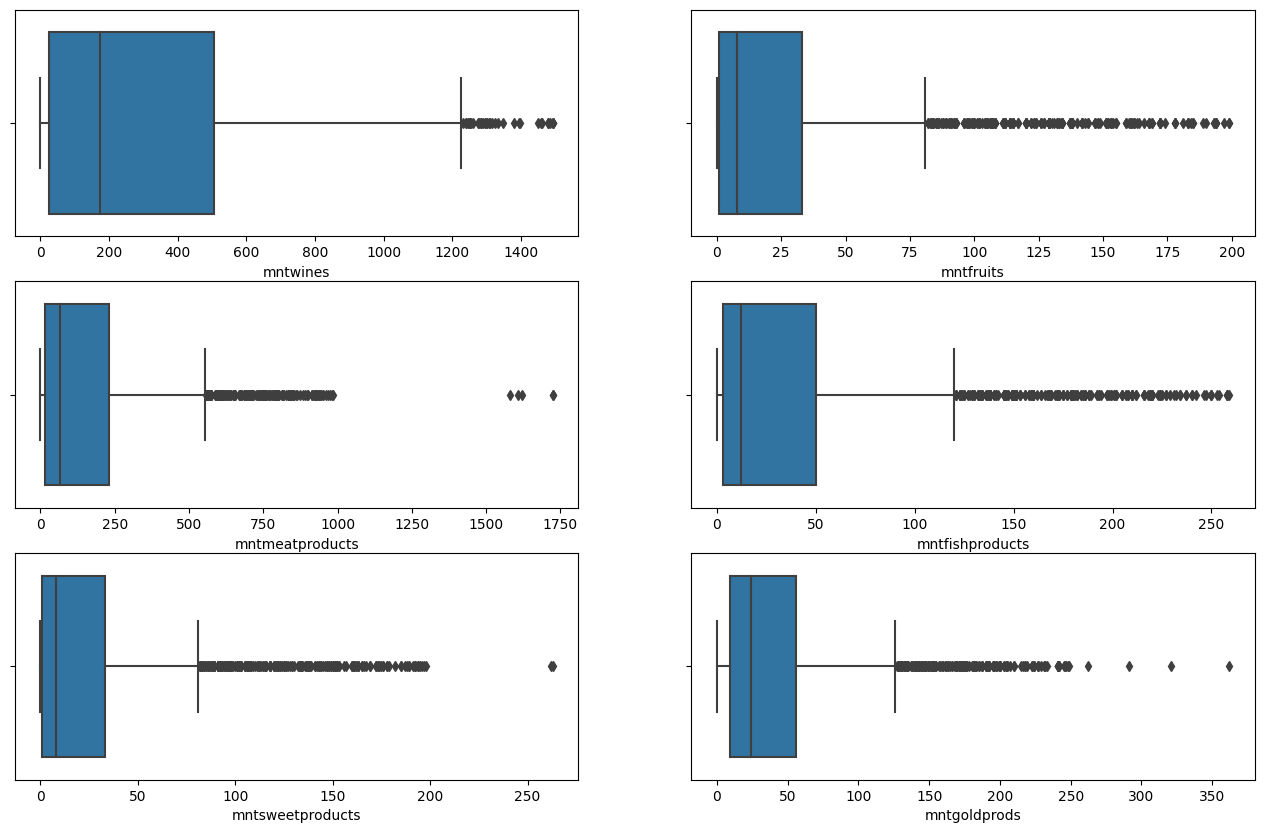

In [230]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.boxplot(x=data['mntwines'],hue=data['income_level'])
plt.subplot(3,2,2)
sns.boxplot(x=data['mntfruits'],hue=data['income_level'])
plt.subplot(3,2,3)
sns.boxplot(x=data['mntmeatproducts'],hue=data['income_level'])
plt.subplot(3,2,4)
sns.boxplot(x=data['mntfishproducts'],hue=data['income_level'])
plt.subplot(3,2,5)
sns.boxplot(x=data['mntsweetproducts'],hue=data['income_level'])
plt.subplot(3,2,6)
sns.boxplot(x=data['mntgoldprods'],hue=data['income_level'])
plt.show()

Outlier Detection and Removal using InterQuartile Range

Age

Find Interquartile range

In [231]:
iqr1,iqr2=np.percentile(data['age'],[75,25])
IQR=np.subtract(iqr1,iqr2)
IQR

18.0

Find Upper and Lower Limit

In [232]:
Upper_limit=iqr1+1.5*(IQR)
Lower_limit=iqr2-1.5*(IQR)
print(f"Upper_limit: {Upper_limit}\n Lower_limit : {Lower_limit}")

Upper_limit: 91.0
 Lower_limit : 19.0


Remove outlier in age

In [233]:
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'visit', 'income_level', 'Total_Children', 'Total_Purchase'],
      dtype='object')

MOdel Development

Choose Relevant Features

In [234]:
X=data[['income','Total_Purchase']]

Perform Elbow method

In [235]:
from sklearn.cluster import KMeans

In [236]:
wcss=[]
for index in range(1,11):
    kmeans=KMeans(n_clusters=index,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

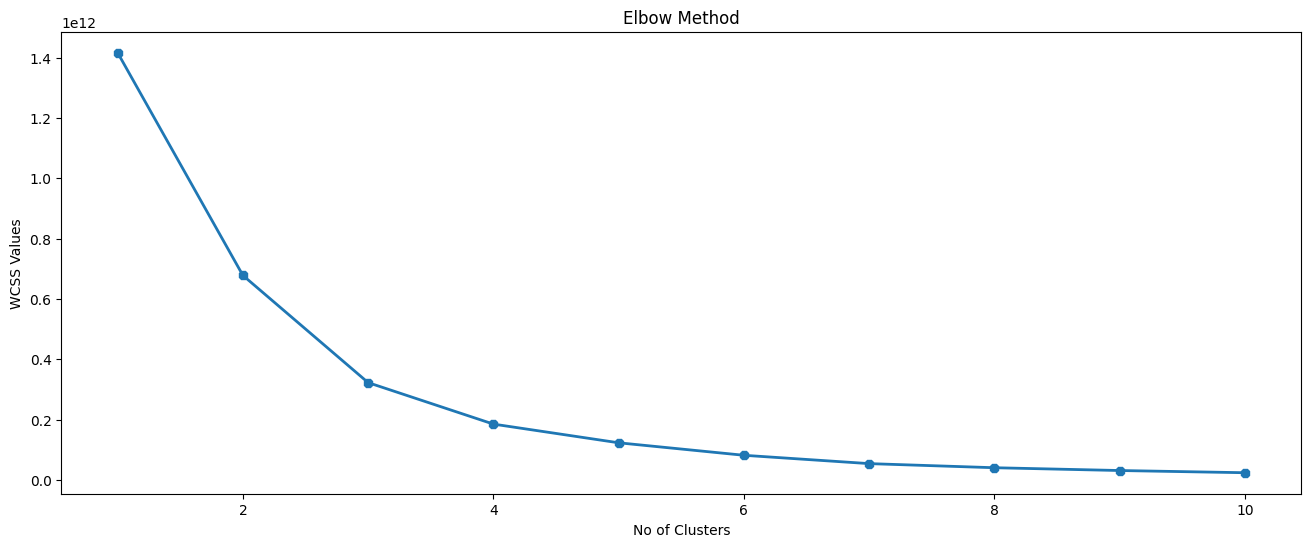

In [237]:
plt.figure(figsize=(16,6))
plt.plot(range(1,11),wcss,linewidth=2,marker='8')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Values')
plt.show()

 Build & Fit Model

In [238]:
model=KMeans(n_clusters=3,init='k-means++')
y_pred=model.fit_predict(X)

In [239]:
print(f'Cluster Centers\n{model.cluster_centers_}')


Cluster Centers
[[3.45365932e+04 1.67771032e+02]
 [7.02884125e+04 1.07134991e+03]
 [6.66666000e+05 6.20000000e+01]]


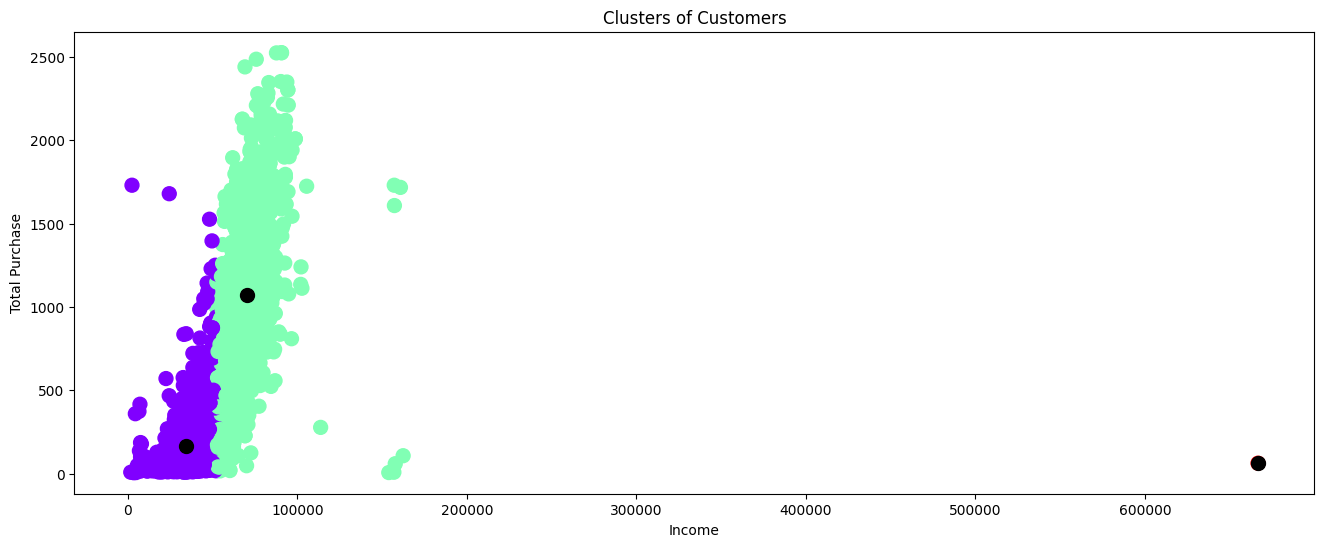

In [240]:
plt.figure(figsize=(16,6))
plt.scatter(X['income'],X['Total_Purchase'],s=100,c=model.labels_,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,color='black')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.show()